In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('deeplearning_ex_1').sheet1

rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,12.0
1,2.0,22.0
2,3.0,32.0
3,4.0,42.0
4,5.0,52.0


In [ ]:
X=df[['Input']].values
y=df[['Output']].values

In [ ]:
y

array([[ 12.],
       [ 22.],
       [ 32.],
       [ 42.],
       [ 52.],
       [ 62.],
       [ 72.],
       [ 82.],
       [ 92.],
       [102.],
       [112.],
       [122.],
       [132.],
       [142.],
       [152.],
       [162.],
       [172.],
       [182.],
       [192.],
       [202.],
       [212.]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Scaler =MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
neuron=Sequential([
    Dense(9,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
neuron.compile(optimizer = 'rmsprop',loss = 'mse')



In [ ]:
X_train1=Scaler.transform(X_train)

In [ ]:
neuron.fit(X_train1,y_train,epochs = 3000)


Epoch 1/3000
1/1 [==============================] - 0s 485ms/step - loss: 15585.9639
Epoch 2/3000
1/1 [==============================] - 0s 10ms/step - loss: 15579.4863
Epoch 3/3000
1/1 [==============================] - 0s 11ms/step - loss: 15573.8955
Epoch 4/3000
1/1 [==============================] - 0s 12ms/step - loss: 15568.5674
Epoch 5/3000
1/1 [==============================] - 0s 14ms/step - loss: 15564.1318
Epoch 6/3000
1/1 [==============================] - 0s 8ms/step - loss: 15560.1953
Epoch 7/3000
1/1 [==============================] - 0s 10ms/step - loss: 15556.5957
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 15553.2324
Epoch 9/3000
1/1 [==============================] - 0s 8ms/step - loss: 15550.0381
Epoch 10/3000
1/1 [==============================] - 0s 11ms/step - loss: 15546.9863
Epoch 11/3000
1/1 [==============================] - 0s 9ms/step - loss: 15544.0557
Epoch 12/3000
1/1 [==============================] - 0s 9ms/step - loss: 1554

<Axes: >

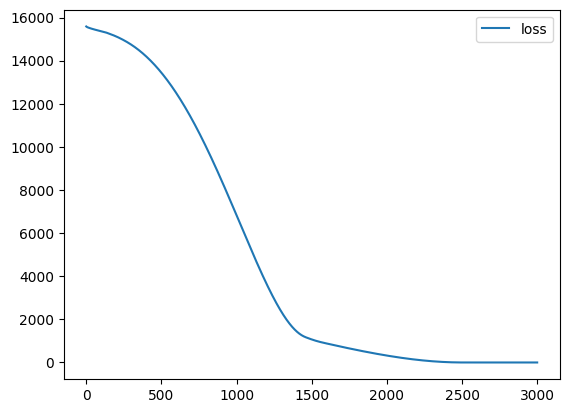

In [ ]:
loss_df = pd.DataFrame(neuron.history.history)

loss_df.plot()

In [ ]:
neuron.evaluate(X_test,y_test)


1/1 [==============================] - 0s 140ms/step - loss: 5636864.5000


5636864.5

In [ ]:
X_n1 = [[150]]


In [ ]:
X_n1_1 = Scaler.transform(X_n1)

neuron.predict(X_n1_1)

1/1 [==============================] - 0s 57ms/step


array([[1500.3663]], dtype=float32)